# 1. Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import random

print(f"Tensoflow: {tf.__version__}")
print(f"Keras: {keras.__version__}")




Tensoflow: 2.18.0
Keras: 3.6.0


# 2. Import dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 3. Understand data type

In [6]:
type(train_images), type(train_labels)

(numpy.ndarray, numpy.ndarray)

In [8]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [10]:
train_images.dtype, train_labels.dtype

(dtype('uint8'), dtype('uint8'))

In [12]:
train_labels[0]

9

In [14]:
class_names = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# 4. Preprocess data

<function matplotlib.pyplot.show(close=None, block=None)>

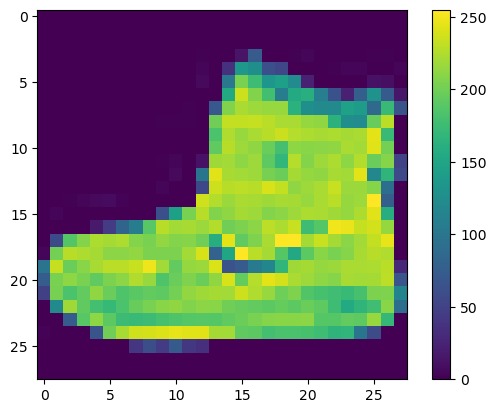

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show

In [19]:
train_images = train_images / 255
test_images = test_images / 255

# 4.5. Plot Data


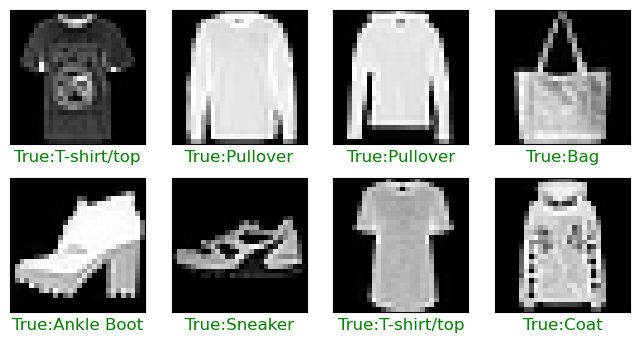

In [123]:
from typing import Optional
def plot_data(img_data: np.ndarray, labels_data: np.ndarray, labels_proba: Optional[np.ndarray] = None) -> None:
    nrows, ncols = 2,4
    fig, axes = plt.subplots(nrows, ncols, figsize=(8,4))

    len_img = img_data.shape[0]
    for i in range(nrows*ncols):
        ax=axes[i // ncols, i % ncols]
        img_idx = random.randint(0, len_img)

        ax.imshow(img_data[img_idx], cmap='gray')
        ax.set(xticks=[], yticks=[])
        ax.grid(False)
        color='green'
        
        true_label_str =f"True:{class_names[labels_data[img_idx]]}"
        
        if labels_proba is not None:
            predicted_idx = np.argmax(labels_proba[img_idx])
            predicted_label = class_names[predicted_idx]
            color='red' if predicted_idx != labels_data[img_idx] else color
            predicted_label_str = f"\nPredicted:{predicted_label}"

        img_title = true_label_str if labels_proba is None else true_label_str + predicted_label_str

        ax.set_xlabel(img_title, color=color, fontsize=12)
    
    plt.show()
plot_data(test_images, test_labels)

In [93]:
train_labels_temp = keras.utils.to_categorical(train_labels, len(class_names))
test_labels_temp = keras.utils.to_categorical(test_labels)

# 5. Build model


In [96]:
input_shape = (28,28,1)

model = keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')                 
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [176]:
epochs = 10
batch_size = 1024

history = model.fit(train_images, train_labels_temp,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.1
         )

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9444 - loss: 0.1473 - val_accuracy: 0.8913 - val_loss: 0.3453
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9416 - loss: 0.1491 - val_accuracy: 0.8950 - val_loss: 0.3187
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9445 - loss: 0.1437 - val_accuracy: 0.9012 - val_loss: 0.3117
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9487 - loss: 0.1362 - val_accuracy: 0.8970 - val_loss: 0.3204
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9490 - loss: 0.1328 - val_accuracy: 0.8942 - val_loss: 0.3412
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9497 - loss: 0.1313 - val_accuracy: 0.8963 - val_loss: 0.3381
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9502 - loss: 0.1289 - val_accuracy: 0.8957 - val_loss: 0.3339
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9518 - loss: 0.1259 - val_accuracy: 0.8887 - va

In [178]:
history_dict = history.history

history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

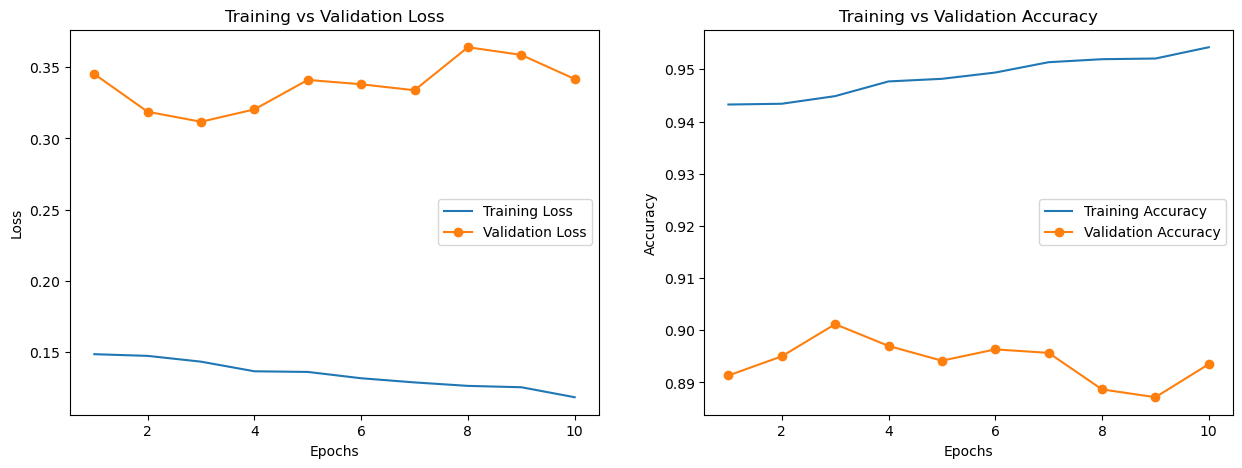

In [180]:
train_loss, val_loss=history_dict['loss'], history_dict['val_loss']
train_acc, val_acc=history_dict['accuracy'], history_dict['val_accuracy']

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))
epoch_runs = [i+1 for i in range(epochs)]

ax1.plot(epoch_runs, train_loss, label='Training Loss')
ax1.plot(epoch_runs, val_loss, label='Validation Loss', marker='o')
ax1.set(title='Training vs Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label='Training Accuracy')
ax2.plot(epoch_runs, val_acc, label='Validation Accuracy', marker='o')
ax2.set(title='Training vs Validation Accuracy', xlabel='Epochs', ylabel='Accuracy')
ax2.legend()

plt.show()

In [182]:
score = model.evaluate(test_images, test_labels_temp)

print(f"Test Accuracy: {score[0]:.4f}")
print(f"Test Loss: {score[1]:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.8876 - loss: 0.3642
Test Accuracy: 0.3564
Test Loss: 0.8917


# 6. Predictions

In [185]:

labels_proba = model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step


In [187]:
predictions = np.argmax(labels_proba, axis=1)


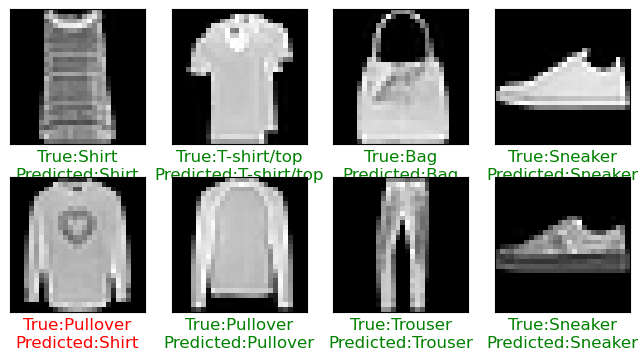

In [196]:
plot_data(test_images, test_labels, labels_proba)